In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification

import warnings
warnings.filterwarnings("ignore")

In [63]:
x, y = make_classification(n_samples=100, n_features=2, n_informative=1, n_redundant=0, n_clusters_per_class=1, random_state=41, n_classes=2, hypercube=False, class_sep=20)

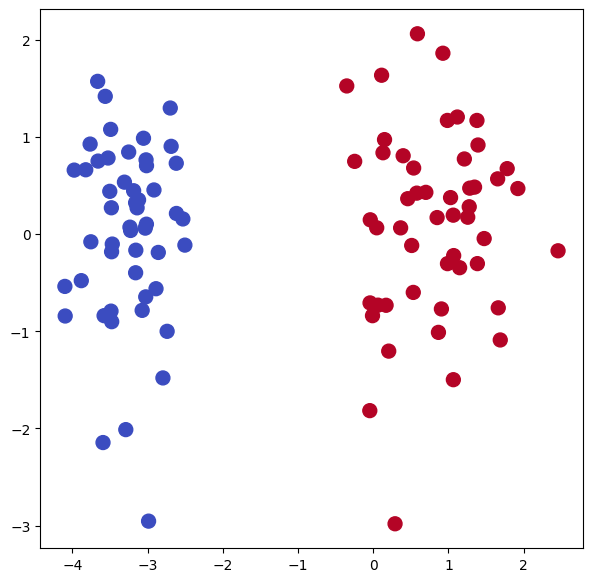

In [64]:
plt.figure(figsize=(7, 7))
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='coolwarm', s=100)
plt.show()

In [65]:
model = LogisticRegression(penalty='none', solver='sag')
model.fit(x, y)

LogisticRegression(penalty='none', solver='sag')

In [66]:
print("Model Coefficients: ", model.coef_)
print("Model Intercept: ", model.intercept_)

model_slope = -(model.coef_[0][0] / model.coef_[0][1])
model_intercept = -(model.intercept_ / model.coef_[0][1])

Model Coefficients:  [[4.77481926 0.20633121]]
Model Intercept:  [5.74061996]


In [67]:
x_values = np.linspace(-3, 3, 100)
y_values = model_slope * x_values + model_intercept

In [68]:
class CustomLogisticRegression:
    
    def __init__(self, alpha: float, epochs: int) -> None:
        self.coef_ = None
        self.intercept_ = None
        self.alpha = alpha
        self.epochs = epochs

    def sigmoid(self, z: np.ndarray) -> np.ndarray:
        return 1 / (1 + np.exp(-z))
    
    def step(self, value: float) -> int:
        return 1 if value > 0 else 0

    def fit_perceptron(self, x: np.ndarray, y: np.ndarray) -> np.ndarray:
        x = np.insert(x, 0, 1, axis=1)
        weights = np.ones(x.shape[1])

        for _ in range(self.epochs):
            value = np.random.randint(0, x.shape[0])
            y_hat = self.step(np.dot(x[value], weights))
            error = y[value] - y_hat
            weights = weights + self.alpha * error * x[value]
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]

    def fit_gd(self, x: np.ndarray, y: np.ndarray) -> None:
        x = np.insert(x, 0, 1, axis=1)
        weights = np.ones(x.shape[1])
        data_points = x.shape[0]
        for _ in range(self.epochs):
            y_hat = self.sigmoid(np.dot(x, weights))
            error = y - y_hat
            weights = weights + self.alpha * (np.dot(error, x) / data_points)
        self.intercept_ = weights[0]
        self.coef_ = weights[1:]



In [69]:
custom_model = CustomLogisticRegression(alpha=0.5, epochs=5000)
custom_model.fit_gd(x, y)

In [70]:
print("Custom Model Coefficients: ", custom_model.coef_)
print("Custom Model Intercept: ", custom_model.intercept_)

custom_model_slope = -(custom_model.coef_[0] / custom_model.coef_[1])
custom_model_intercept = -(custom_model.intercept_ / custom_model.coef_[1])

Custom Model Coefficients:  [4.83926872 0.21182255]
Custom Model Intercept:  5.83338864905325


In [71]:
x_values_custom = np.linspace(-3, 3, 100)
y_values_custom = custom_model_slope * x_values_custom + custom_model_intercept

In [72]:
custom_perceptron_model = CustomLogisticRegression(alpha=0.5, epochs=5000)
custom_perceptron_model.fit_perceptron(x, y)

In [73]:
print("Custom Perceptron Model Coefficients: ", custom_perceptron_model.coef_)
print("Custom Perceptron Model Intercept: ", custom_perceptron_model.intercept_)
custom_perceptron_model_slope = -(custom_perceptron_model.coef_[0] / custom_perceptron_model.coef_[1])
custom_perceptron_model_intercept = -(custom_perceptron_model.intercept_ / custom_perceptron_model.coef_[1])

Custom Perceptron Model Coefficients:  [ 1.14502124 -0.49046216]
Custom Perceptron Model Intercept:  1.5


In [74]:
x_values_perceptron = np.linspace(-3, 3, 100)
y_values_perceptron = custom_perceptron_model_slope * x_values_perceptron + custom_perceptron_model_intercept

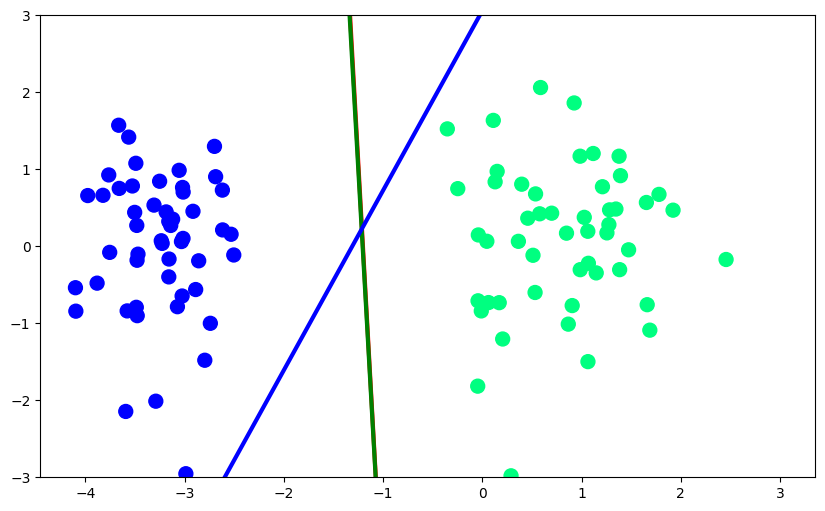

In [75]:
plt.figure(figsize=(10, 6))
plt.plot(x_values, y_values, color='red', linewidth=3)
plt.plot(x_values_custom, y_values_custom, color='green', linewidth=3)
plt.plot(x_values_perceptron, y_values_perceptron, color='blue', linewidth=3)
plt.scatter(x[:, 0], x[:, 1], c=y, cmap='winter', s=100)
plt.ylim(-3, 3)
plt.show()